In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("datasets/train-with-severities-and-multilabels.csv")
#test = pd.read_csv("datasets/test-with-severities-and-multilabels.csv")
test = pd.read_csv("datasets/gendered_test_with_categories.csv")
val = pd.read_csv("datasets/val-with-severities-and-multilabels.csv")

train.head()

,Sentence,Label,Severity,Sadness,Pessimism,Sense_of_failure,Loss_of_Pleasure,Guilty_feelings,Sense_of_punishment,Self-dislike,...,Social_withdrawal,Indecision,Feelings_of_worthlessness,Loss_of_energy,Change_of_sleep,Irritability,Changes_in_appetite,Concentration_difficulty,Tiredness_or_fatigue,Loss_of_interest_in_sex
0,It's a complicated thing that happens to peopl...,1,2,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Im so upset.,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,I just cant say anything to her because I dont...,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Like maybe I'm just not exerting enough energy...,1,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,i burnt out and i still am unmotivated and fee...,1,2,1,1,0,1,0,0,0,...,1,0,1,1,0,0,0,1,1,0


In [3]:
train = train.drop_duplicates()
test = test.drop_duplicates()
val = val.drop_duplicates()

In [4]:
train = train[train['Label'].notna()]
train = train[train['Sentence'].notna()]

test = test[test['Label'].notna()]
test = test[test['Sentence'].notna()]

val = val[val['Label'].notna()]
val = val[val['Sentence'].notna()]

**Basic statistics**

In [5]:
len(train)

1006

In [6]:
len(val)

163

In [7]:
len(test)

208

In [8]:
len(train[train['Label']==1]) #64.45 percent

422

In [9]:
len(val[val['Label']==1]) #11.91 percent

78

In [10]:
len(test[test['Label']==1]) #23.66 percent

99

In [11]:
train_val_test = pd.concat([train, val])
train_val_test = pd.concat([train_val_test, test])

train_val_test = train_val_test.drop_duplicates()

train_val_test.head()

,Sentence,Label,Severity,Sadness,Pessimism,Sense_of_failure,Loss_of_Pleasure,Guilty_feelings,Sense_of_punishment,Self-dislike,...,Tiredness_or_fatigue,Loss_of_interest_in_sex,Subject,Gender,Affective,Motivational,Cognitive,Cog_distortions,Behavioral,Physiological
0,It's a complicated thing that happens to peopl...,1,2,1,1,0,1,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Im so upset.,1,2,0,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I just cant say anything to her because I dont...,1,1,0,0,0,1,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Like maybe I'm just not exerting enough energy...,1,2,0,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,i burnt out and i still am unmotivated and fee...,1,2,1,1,0,1,0,0,0,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
len(train_val_test)

1330

In [13]:
len(train_val_test[train_val_test["Label"]==1])

561

**Number of sentences for each symptom**

In [14]:
for name in train.columns:
    count = train[name].value_counts()
    print(count)

Sentence
It's a complicated thing that happens to peoples' heads from time to time, where we just lose all hope and meaning in the world.    1
Nothing wrong with it.                                                                                                              1
*\n\nI totally, unironically, love that adaptation with all my heart.                                                               1
I found this very productive.                                                                                                       1
Also, minor, but some of the smaller rocks kind of merge into the base part of the foam.                                            1
                                                                                                                                   ..
Its in the palm of my hands if I ever see my future crumble too irreparably.                                                        1
I've been feeling slightly better about life recently

In [15]:
for name in val.columns:
    count = val[name].value_counts()
    print(count)

Sentence
Im such a useless idiot.                                                          1
Nah man.                                                                          1
I have a feeling that 15 gas might not be the best build for a newb.              1
But... we do talk.                                                                1
Theres this one guy, his recaps only ever involve what his character is doing.    1
                                                                                 ..
This post brought tears to my eyes.                                               1
im failing my life im losing grip on my self.                                     1
Didnt fail and it helps me relax so much.                                         1
im in high school and i want to die.                                              1
Sugary and fatty maybe.                                                           1
Name: count, Length: 163, dtype: int64
Label
0    85
1    78
Name: 

In [16]:
for name in test.columns:
    count = test[name].value_counts()
    print(count)

Sentence
Thank you!                                                                                           2
Ughhhh I'm in this position too and I am really pissed off, I feel your pain so much.                1
Fuck yes to this.                                                                                    1
Don’t bring a gun to a brick fight.                                                                  1
It's like slavery but with more steps.                                                               1
                                                                                                    ..
She is the love of my life i love her more than anything.                                            1
Yes you really cant know 100% surely if someday the love of your life is going to fuck you up.       1
I have sleeping problems and thats why i usually skip school(thats why im stressed all the time).    1
Im failing school im failing my life.                           

In [17]:
for name in train_val_test.columns:
    count = train_val_test[name].value_counts()
    print(count)

Sentence
Thank you!                                                                                                                                                                                          3
Thank you so much, I'm so excited to try all of these goodies out!!!                                                                                                                                2
im failing my life im losing grip on my self.                                                                                                                                                       2
Yes you really cant know 100% surely if someday the love of your life is going to fuck you up.                                                                                                      2
Life is fucked.                                                                                                                                                                                     2
 

In [18]:
counts = []
names = []

for name in test.columns[3:24]:
    names.append(name)
    counts.append(len(test[test[name] == 1]))

for i in range(len(counts)):
    print(f"Number of sentences for symptom {names[i]}: {counts[i]}")

Number of sentences for symptom Sadness: 23
Number of sentences for symptom Pessimism: 7
Number of sentences for symptom Sense_of_failure: 7
Number of sentences for symptom Loss_of_Pleasure: 28
Number of sentences for symptom Guilty_feelings: 3
Number of sentences for symptom Sense_of_punishment: 0
Number of sentences for symptom Self-dislike: 9
Number of sentences for symptom Self-incrimination: 0
Number of sentences for symptom Suicidal_ideas: 9
Number of sentences for symptom Crying: 6
Number of sentences for symptom Agitation: 5
Number of sentences for symptom Social_withdrawal: 8
Number of sentences for symptom Indecision: 3
Number of sentences for symptom Feelings_of_worthlessness: 5
Number of sentences for symptom Loss_of_energy: 2
Number of sentences for symptom Change_of_sleep: 1
Number of sentences for symptom Irritability: 11
Number of sentences for symptom Changes_in_appetite: 2
Number of sentences for symptom Concentration_difficulty: 3
Number of sentences for symptom Tire

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


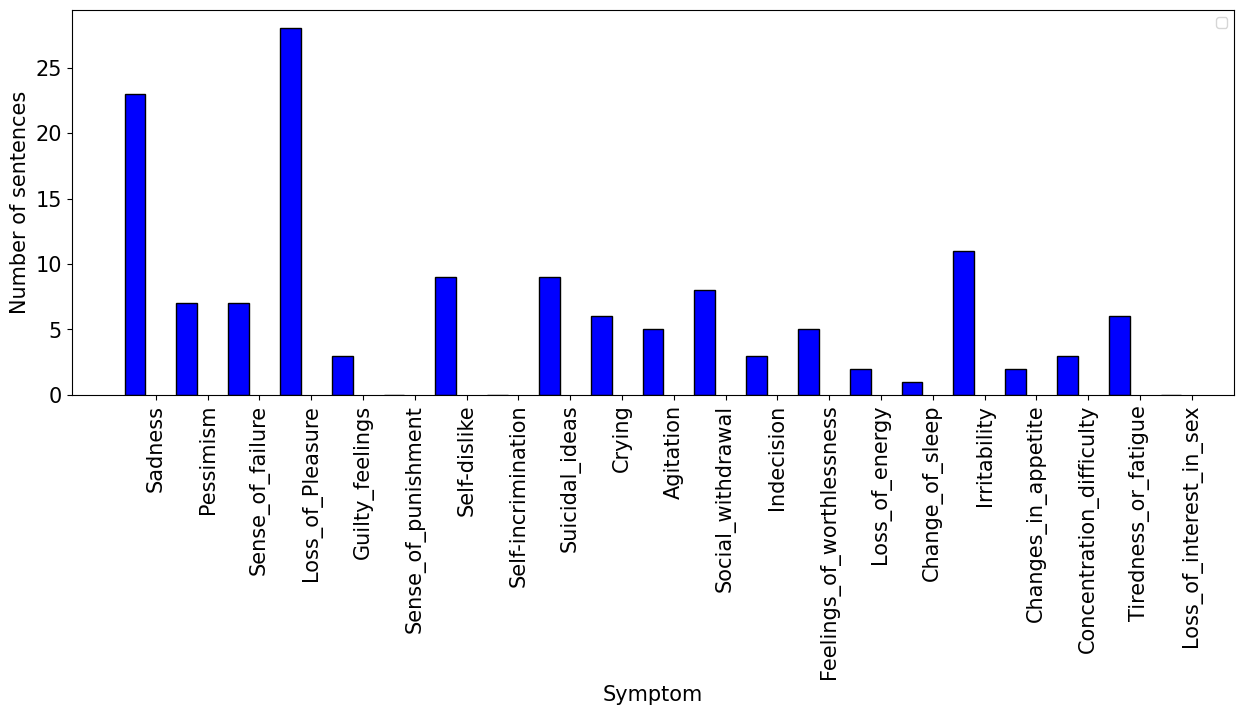

In [21]:
r= np.arange(21)
width = 0.4
        
bar = plt.bar(r, counts, color='b', width = width, edgecolor = 'black')
  
#plt.rcParams["figure.figsize"] = (15,5)
plt.xlabel("Symptom", fontsize=15) 
plt.ylabel("Number of sentences", fontsize=15) 
#plt.title("Distribution of sentences over users", fontweight="bold") 
  
plt.xticks(r + width, names, rotation=90, fontsize=15) 
plt.yticks(fontsize=15)
plt.legend() 
      
plt.show() 

In [ ]:
#counts of sentences per severity level

counts = []
names = []

unique_severity = [0,1,2,3,4]

for value in unique_severity:
    names.append(value)
    counts.append(len(train_val_test[train_val_test['Severity'] == value])) 

for i in range(len(counts)):
    print(f"Number of sentences for Severity Value {names[i]}: {counts[i]}")

In [ ]:
r= np.arange(5)
width = 0.5
        
bar = plt.bar(r, counts, color='b', width = width, edgecolor = 'black')
  
plt.xlabel("Severity", fontsize=12) 
plt.ylabel("Number of sentences", fontsize=12) 
#plt.title("Distribution of sentences over users", fontweight="bold") 
  
plt.xticks(r + width,names, rotation=45, fontsize=12) 
plt.legend() 
      
plt.show() 

In [ ]:
#train_val_test.to_csv('All-BDI-Sen.csv', index=False)

**Creating a Dataframe of only the control sentences (unfound in eRisk2019)**

In [ ]:
unfound = pd.read_csv("unfound_sentences.csv")
unfound = unfound.columns.tolist()

In [ ]:
locss = []
for sentence in unfound:
    for i in range(len(train_val_test)):
        if train_val_test.iloc[i]["Sentence"] == sentence:
            locss.append(i)

In [ ]:
unfound_df = train_val_test.iloc[locss]

In [ ]:
unfound_df

In [ ]:
#unfound_df.to_csv('Unfound_BDI-Sen.csv', index=False)

**Creating a Dataframe of only the depression sentences (found in eRisk2019)**

In [ ]:
found = pd.read_csv("found_sentences.csv")
found = found.columns.tolist()

In [ ]:
locss = []
for sentence in found:
    for i in range(len(train_val_test)):
        if train_val_test.iloc[i]["Sentence"] == sentence:
            locss.append(i)

In [ ]:
found_df = train_val_test.iloc[locss]

In [ ]:
found_df

In [ ]:
#found_df.to_csv('Found_BDI-Sen.csv', index=False)